In [1]:
## Library Import

# Basic
import re
import warnings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

# Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer

# AutoML optuna library
import optuna
import optuna.integration.lightgbm as lgb

# Linear Model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Tree Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Metric
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

## for PCA
from sklearn.decomposition import PCA

# for VIF
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('final_data_260_by_ffill_ver1.csv', index_col = 0)

In [3]:
df.reset_index(inplace = True)

In [4]:
date = df.date

In [5]:
target = df['KRXsemiconductor_close']

In [6]:
X_data = df.copy()

In [7]:
X_data.drop(['date', 'KRXsemiconductor_close'], axis = 1, inplace = True)

In [8]:
410/len(df)

0.13753773901375377

In [9]:
df.tail(409)

,date,KRXsemiconductor_close,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,...,Microsoft_close260,Nuvoton_close120,Nuvoton_close260,Nvidia_close120,Nvidia_close260,Philadelphia_close120,Philadelphia_close260,QCOM_close120,QCOM_close260,SamsungElectronics_close120,SamsungElectronics_close260,ShinEtsuChemical_close120,ShinEtsuChemical_close260,Siltronic_close120,Siltronic_close260,SKhynix_close120,SKhynix_close260,Sumco_close120,Sumco_close260,TokyoElectron_close120,TokyoElectron_close260,TSMC_close120,TSMC_close260,UMC_close120,UMC_close260
2572,2017-02-06,0.266921,2.2,1.6,2.6,0.5,1.7,-14.7,18806.74,2.5,1.4,2.0,1.7,2.1,1.4,1.73005,0.1,0.2,0.2,0.2,1.3,1.7,4.7,9.4,255.0,...,0.221430,0.128891,0.358337,0.556009,0.959339,0.144590,0.374220,-0.250097,-0.029984,0.147935,0.443857,0.151148,0.372195,0.646591,1.167176,0.240988,0.713825,0.711088,1.210650,0.047365,0.046701,0.000086,0.229996,0.000000,0.017890
2573,2017-02-07,0.266792,2.2,1.6,2.6,0.5,1.7,-14.7,18806.74,2.5,1.4,2.0,1.7,2.1,1.4,1.73005,0.1,0.2,0.2,0.2,1.3,1.7,4.7,9.4,255.0,...,0.231037,0.138150,0.342945,0.567597,0.973062,0.152806,0.370969,-0.229206,-0.016629,0.144409,0.411666,0.143657,0.377162,0.616822,1.131644,0.255068,0.672701,0.700804,1.192068,0.050529,0.053190,-0.004153,0.194139,-0.010582,0.010695
2574,2017-02-08,0.281844,2.2,1.6,2.6,0.5,1.7,-14.7,18806.74,2.5,1.4,2.0,1.7,2.1,1.4,1.73005,0.1,0.2,0.2,0.2,1.3,1.7,4.7,9.4,238.0,...,0.222677,0.247769,0.387254,0.577605,0.947799,0.175735,0.348722,-0.219090,-0.048887,0.217301,0.412521,0.171934,0.377090,0.600387,1.052068,0.279165,0.709749,0.730988,1.165965,0.054347,0.053682,-0.002225,0.206568,-0.010582,0.007117
2575,2017-02-09,0.277489,2.0,2.0,2.5,9.3,1.1,44.8,18991.88,3.5,2.1,1.4,2.1,2.2,1.7,1.79465,0.3,0.2,0.3,0.2,1.7,1.7,4.7,9.2,238.0,...,0.197549,0.246182,0.391788,0.554327,0.933086,0.170434,0.334550,-0.218828,-0.055941,0.223795,0.393814,0.176425,0.368522,0.671046,1.082535,0.244959,0.666910,0.763510,1.174655,0.063617,0.050301,-0.008853,0.187024,-0.014085,-0.007067
2576,2017-02-10,0.307722,2.0,2.0,2.5,9.3,1.1,44.8,18991.88,3.5,2.1,1.4,2.1,2.2,1.7,1.79465,0.3,0.2,0.3,0.2,1.7,1.7,4.7,9.2,238.0,...,0.215937,0.246231,0.393470,0.546679,0.898949,0.181480,0.330719,-0.192872,-0.031146,0.208522,0.392000,0.187486,0.380686,0.802474,1.160437,0.199667,0.616169,0.868645,1.267212,0.064916,0.050268,0.007880,0.192209,-0.005305,-0.014085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,2018-10-04,0.065541,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.9,2.4,2.5,2.11439,0.2,0.2,0.1,0.1,3.4,2.8,3.9,7.5,215.0,...,0.227080,-0.485908,-0.466805,0.051765,0.216529,-0.065167,-0.012628,0.187404,0.061255,-0.137714,-4.016422,-0.158181,-0.230887,-0.330446,-0.238354,-0.262361,-0.056919,-0.492996,-0.191682,-0.082364,-0.121134,0.054391,0.005365,-0.101495,-0.008863
2977,2018-10-05,0.087007,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.9,2.4,2.5,2.11439,0.2,0.2,0.1,0.1,3.4,2.8,3.9,7.5,215.0,...,0.208163,-0.551445,-0.530876,0.026032,0.183548,-0.079172,-0.040714,0.158268,0.044748,-0.123975,-4.022049,-0.172504,-0.243538,-0.376015,-0.303179,-0.256985,-0.067379,-0.563265,-0.287682,-0.102406,-0.142743,0.040224,-0.036506,-0.126752,-0.020803
2978,2018-10-08,0.086912,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.9,2.4,2.5,2.11439,0.2,0.2,0.1,0.1,3.4,2.8,3.9,7.5,215.0,...,0.196450,-0.564213,-0.548296,0.013169,0.143493,-0.082016,-0.053119,0.160566,0.041007,-0.099446,-4.004780,-0.162831,-0.257039,-0.348865,-0.334507,-0.216376,-0.029067,-0.637921,-0.469580,-0.103857,-0.135273,0.027368,-0.093994,-0.124454,-0.026748
2979,2018-10-10,0.095500,3.5,3.2,4.0

In [10]:
X_data

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,...,Microsoft_close260,Nuvoton_close120,Nuvoton_close260,Nvidia_close120,Nvidia_close260,Philadelphia_close120,Philadelphia_close260,QCOM_close120,QCOM_close260,SamsungElectronics_close120,SamsungElectronics_close260,ShinEtsuChemical_close120,ShinEtsuChemical_close260,Siltronic_close120,Siltronic_close260,SKhynix_close120,SKhynix_close260,Sumco_close120,Sumco_close260,TokyoElectron_close120,TokyoElectron_close260,TSMC_close120,TSMC_close260,UMC_close120,UMC_close260
0,0.9,3.1,2.0,-2.6,-0.1,92.7,13749.81,6.5,3.4,2.9,4.1,2.7,3.3,2.42117,0.5,0.2,0.1,0.3,2.6,2.2,4.7,8.5,318.0,2477.0,196.0,...,0.022620,0.000000,0.000000,0.207492,0.420394,-0.023130,-0.072856,-0.223249,-0.166448,0.074108,0.019535,0.000000,0.000000,0.000000,0.000000,0.200526,0.059371,0.000000,0.000000,-0.064981,-0.082307,0.000747,-0.011141,-0.043959,-0.028507
1,0.9,3.1,2.0,-2.6,-0.1,92.7,13749.81,6.5,3.4,2.9,4.1,2.7,3.3,2.42117,0.5,0.2,0.1,0.3,2.6,2.2,4.7,8.5,310.0,2467.0,196.0,...,0.032314,0.000000,0.000000,0.251842,0.454694,-0.002988,-0.068967,-0.170490,-0.140284,0.057070,0.003003,0.000000,0.000000,0.000000,0.000000,0.157181,0.010444,0.000000,0.000000,-0.061928,-0.089795,-0.011778,-0.017598,-0.062811,-0.009924
2,0.9,3.1,2.0,-2.6,-0.1,92.7,13749.81,6.5,3.4,2.9,4.1,2.7,3.3,2.42117,0.5,0.2,0.1,0.3,2.6,2.2,4.7,8.5,310.0,2467.0,196.0,...,0.002877,0.000000,0.000000,0.232146,0.420947,-0.028203,-0.093909,-0.165592,-0.162152,0.055656,-0.049864,0.000000,0.000000,0.000000,0.000000,0.140479,0.077641,0.000000,0.000000,-0.072469,-0.089795,-0.004402,-0.022865,-0.050937,-0.005001
3,0.9,3.1,2.0,-2.6,-0.1,92.7,13749.81,6.5,3.4,2.9,4.1,2.7,3.3,2.42117,0.5,0.2,0.1,0.3,2.6,2.2,4.7,8.5,310.0,2467.0,196.0,...,-0.015527,0.000000,0.000000,0.208045,0.371779,-0.029949,-0.123594,-0.191458,-0.173231,0.059860,-0.037514,0.000000,0.000000,0.000000,0.000000,0.141528,0.060283,0.000000,0.000000,-0.061480,-0.089154,0.001365,-0.044656,-0.068707,-0.015468
4,0.9,3.1,2.0,-2.6,-0.1,92.7,13749.81,6.5,3.4,2.9,4.1,2.7,3.3,2.42117,0.5,0.2,0.1,0.3,2.6,2.2,4.7,8.5,310.0,2467.0,196.0,...,0.010854,0.000000,0.000000,0.240194,0.390524,-0.013343,-0.120291,-0.170190,-0.198078,0.047253,-0.055362,0.000000,0.000000,0.000000,0.000000,0.131403,0.052789,0.000000,0.000000,-0.064981,-0.132552,0.003164,-0.056091,-0.063460,-0.015388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2976,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.9,2.4,2.5,2.11439,0.2,0.2,0.1,0.1,3.4,2.8,3.9,7.5,215.0,1713.0,178.0,...,0.227080,-0.485908,-0.466805,0.051765,0.216529,-0.065167,-0.012628,0.187404,0.061255,-0.137714,-4.016422,-0.158181,-0.230887,-0.330446,-0.238354,-0.262361,-0.056919,-0.492996,-0.191682,-0.082364,-0.121134,0.054391,0.005365,-0.101495,-0.008863
2977,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.9,2.4,2.5,2.11439,0.2,0.2,0.1,0.1,3.4,2.8,3.9,7.5,215.0,1713.0,178.0,...,0.208163,-0.551445,-0.530876,0.026032,0.183548,-0.079172,-0.040714,0.158268,0.044748,-0.123975,-4.022049,-0.172504,-0.243538,-0.376015,-0.303179,-0.256985,-0.067379,-0.563265,-0.287682,-0.102406,-0.142743,0.040224,-0.036506,-0.126752,-0.020803
2978,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.9,2.4,2.5,2.11439,0.2,0.2,0.1,0.1,3.4,2.8,3.9,7.5,215.0,1713.0,178.0,...,0.196450,-0.564213,-0.548296,0.013169,0.143493,-0.082016,-0.053119,0.160566,0.041007,-0.099446,-4.004780,-0.162831,-0.257039,-0.348865,-0.334507,-0.216376,-0.029067,-0.637921,-0.469580,-0.103857,-0.135273,0.027368,-0.093994,-0.124454,-0.026748
2979,3.5,3.2,4.0,-1.8,2.6,-28.0,20510.18,6.0,3.2,2.1,2.7,2.2,2.3,2.00137

In [11]:
#X_data= X_data[['MGT2MAIndex', 'SKLICONEIndex', 'EHCAKRYIndex120', 'KOHOINCYIndex120', 'KOULMGFIndex120', 'TokyoElectron_close120', 'SKCIYOYIndex120', 'KOGNICUYIndex120', 'KOECSPRQIndex', 'KOEAUERSIndex120', 'DGNOCHNGIndex', 'NMDPIndex260', 'KOQEEYOYIndex', 'Nvidia_close120', 'SKCIMOMIndex120', 'KODSDISCIndex', 'KOECSEMQIndex', 'GDPCQOQIndex', 'KOECFCSYIndex120', 'UMC_close120', 'JOLTOPENIndex120', 'EOKOS002Index120', 'ShinEtsuChemical_close120', 'MWINCHNGIndex', 'USEMNCHGIndex', 'PRODNFR%Index', 'Nuvoton_close120', 'SKCIYOYIndex260', 'LMNIDS03Comdty120', 'KOFDITYIndex', 'Siltronic_close120', 'FDIUSGYOIndex120', 'KORSTIndex120']]

In [11]:
len(X_data)

2981

In [12]:
#X_data['target'] = target

In [13]:
len(X_data.columns)

754

In [14]:
# scaling 하기전에 columns 뽑기 
col_name = X_data.columns

In [15]:
X_data.columns

Index(['GDPCQOQIndex', 'GDPCYOYIndex', 'GDPCTOT%Index', 'GPDITOC%Index', 'GPGSTOC%Index',
       'RGCDCIPIIndex', 'GDPCUR$Index', 'GDPCURYIndex', 'GDPPIQQIndex', 'GDPCPCECIndex',
       ...
       'SKhynix_close120', 'SKhynix_close260', 'Sumco_close120', 'Sumco_close260',
       'TokyoElectron_close120', 'TokyoElectron_close260', 'TSMC_close120', 'TSMC_close260',
       'UMC_close120', 'UMC_close260'],
      dtype='object', length=754)

In [16]:
# scaling과 동시에 변환
X_data = StandardScaler().fit_transform(X_data)

In [17]:
# scaling하면 colname사라지므로 다시 생성
X_data = pd.DataFrame(X_data, columns = col_name)

In [18]:
#X_train, X_test, y_train, y_test = train_test_split(X_data, target, test_size = 0.127, shuffle = False)
X_train, X_test, y_train, y_test = train_test_split(X_data, target, test_size = 0.2, shuffle = False)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2384, 754), (597, 754), (2384,), (597,))

In [16]:
#pca = PCA(n_components = 20)

In [17]:
#pca.fit(X_data)

PCA(copy=True, iterated_power='auto', n_components=20, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
#X_pca = pca.transform(X_data)

In [19]:
# shape check
#X_pca.shape

(2981, 20)

In [52]:
# random split과 not random split
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, shuffle = False)

In [21]:
# 이건 PCA를 위한 Data split
#X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size = 0.2, shuffle = False)

In [20]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    def makedf(self):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

# Linear Model

In [21]:
# linear model select
ridge_reg = Ridge(alpha = 100)
lr_reg = LinearRegression()
#lasso = Lasso(alpha = 100)

In [22]:
X_train.shape, y_train.shape

((2384, 754), (2384,))

In [23]:
ridge_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)

In [24]:
metr = CustomMetric(ridge_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.804971,0.5663,0.1668,0.1865,0.819095,0.986667


In [25]:
lr_reg.fit(X_train, y_train)
y_pred = lr_reg.predict(X_test)

In [26]:
metr = CustomMetric(y_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,-0.135272,-1918173211108185647087616.0000,353406287298.1723,392276762462.3701,0.445561,0.506667


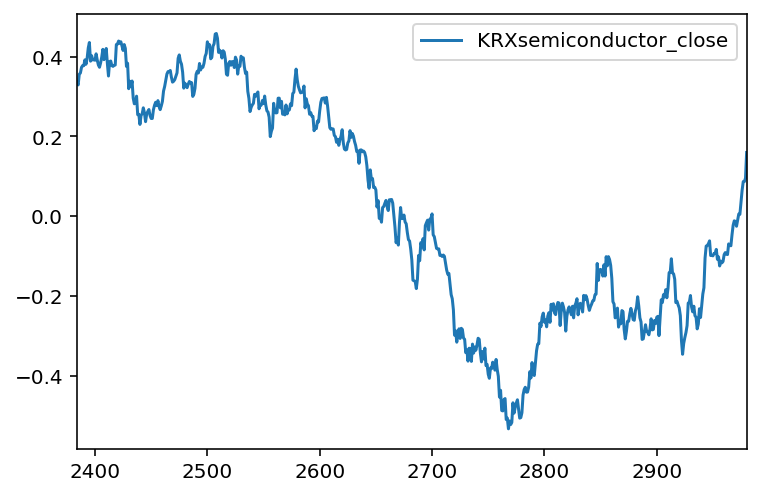

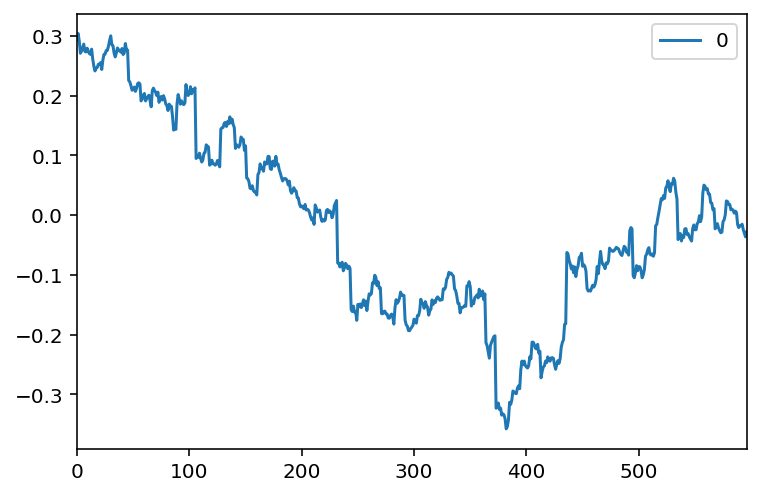

In [27]:
pd.DataFrame(y_test).plot()
pd.DataFrame(ridge_pred).plot()
plt.show()

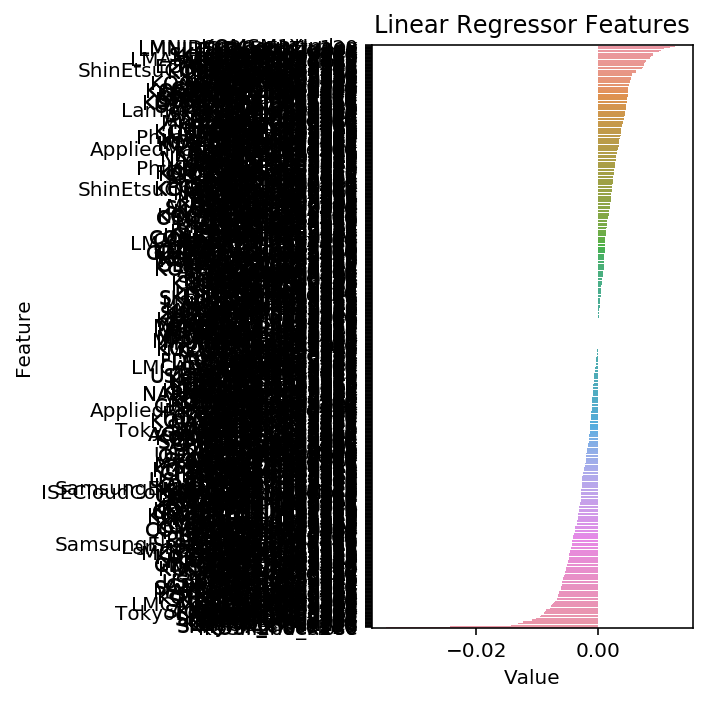

In [28]:
coef_imp = pd.DataFrame(sorted(zip(ridge_reg.coef_, X_train.columns)), columns = ['Value', 'Feature'])
coef_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 5))
sns.barplot(x = 'Value', y = 'Feature', data = coef_imp.sort_values(by = 'Value', ascending = False))
plt.title('Linear Regressor Features')
plt.tight_layout()
plt.show()

Tree Model은 feature importance가 따로 뽑히므로 아래와 같이 시각화

# Optuna AutoML을 통한 LightGBM Hyperparameter tuning

hyperparameter tuning 전, Ridge 상위 변수 반영

In [29]:
treedf = df[['MGT2MAIndex', 'SKLICONEIndex', 'EHCAKRYIndex120', 'KOHOINCYIndex120', 'KOULMGFIndex120', 'TokyoElectron_close120', 'SKCIYOYIndex120', 'KOGNICUYIndex120', 'KOECSPRQIndex', 'KOEAUERSIndex120', 'DGNOCHNGIndex', 'NMDPIndex260', 'KOQEEYOYIndex', 'Nvidia_close120', 'SKCIMOMIndex120', 'KODSDISCIndex', 'KOECSEMQIndex', 'GDPCQOQIndex', 'KOECFCSYIndex120', 'UMC_close120', 'JOLTOPENIndex120', 'EOKOS002Index120', 'ShinEtsuChemical_close120', 'MWINCHNGIndex', 'USEMNCHGIndex', 'PRODNFR%Index', 'Nuvoton_close120', 'SKCIYOYIndex260', 'LMNIDS03Comdty120', 'KOFDITYIndex', 'Siltronic_close120', 'FDIUSGYOIndex120', 'KORSTIndex120']]

In [30]:
len(treedf)

2981

In [31]:
X_train, X_test, y_train, y_test = train_test_split(treedf, target, test_size = 0.2, shuffle = False)

In [32]:
import sklearn.ensemble
import sklearn.model_selection
from sklearn.metrics import r2_score
import optuna
import optuna.integration.lightgbm as lgb

In [43]:
dtrain = lgb.Dataset(X_train, label=y_train)
dval = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'regression',
    'metric': 'l2',
    'verbosity': -1,
    'boosting_type': 'gbdt',
}

best_params, tuning_history = dict(), list()

model = lgb.train(params,
                  dtrain,
                  valid_sets=[dtrain, dval],
                  best_params=best_params,
                  tuning_history=tuning_history,
                  verbose_eval=100,
                  early_stopping_rounds=100,
                  )

prediction = np.rint(model.predict(X_test, num_iteration=model.best_iteration))
r2_score = r2_score(y_test, prediction)

print('Number of finished trials: {}'.format(len(tuning_history)))
print('Best params:', best_params)
print('  r2_score = {}'.format(r2_score))
print('  Params: ')
for key, value in best_params.items():
    print('    {}: {}'.format(key, value))

tune_feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000438911	valid_1's l2: 0.0565555
[200]	training's l2: 0.000234903	valid_1's l2: 0.0560839
[300]	training's l2: 0.000150424	valid_1's l2: 0.0557651
[400]	training's l2: 0.000103726	valid_1's l2: 0.0555044
[500]	training's l2: 7.41787e-05	valid_1's l2: 0.0554283
[600]	training's l2: 5.57244e-05	valid_1's l2: 0.055267
[700]	training's l2: 4.26271e-05	valid_1's l2: 0.0553404
Early stopping, best iteration is:
[603]	training's l2: 5.52436e-05	valid_1's l2: 0.055254


tune_feature_fraction, val_score: 0.055254:  14%|#4        | 1/7 [00:01<00:06,  1.12s/it]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000420715	valid_1's l2: 0.0537706
[200]	training's l2: 0.000220722	valid_1's l2: 0.0534153
[300]	training's l2: 0.00013951	valid_1's l2: 0.0532019
Early stopping, best iteration is:
[264]	training's l2: 0.000161831	valid_1's l2: 0.0531294


tune_feature_fraction, val_score: 0.053129:  29%|##8       | 2/7 [00:01<00:04,  1.05it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000404237	valid_1's l2: 0.0535616
[200]	training's l2: 0.000211688	valid_1's l2: 0.0532422
[300]	training's l2: 0.000131922	valid_1's l2: 0.0530379
[400]	training's l2: 8.89282e-05	valid_1's l2: 0.0528757
[500]	training's l2: 6.28734e-05	valid_1's l2: 0.0527597
Early stopping, best iteration is:
[496]	training's l2: 6.38504e-05	valid_1's l2: 0.052746


tune_feature_fraction, val_score: 0.052746:  43%|####2     | 3/7 [00:02<00:03,  1.02it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000402789	valid_1's l2: 0.0584651
Early stopping, best iteration is:
[87]	training's l2: 0.00045109	valid_1's l2: 0.0583022


tune_feature_fraction, val_score: 0.052746:  57%|#####7    | 4/7 [00:03<00:02,  1.19it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000399942	valid_1's l2: 0.0566531
[200]	training's l2: 0.000203026	valid_1's l2: 0.0564677
[300]	training's l2: 0.000121486	valid_1's l2: 0.0561445
[400]	training's l2: 8.21395e-05	valid_1's l2: 0.0560642
[500]	training's l2: 5.69471e-05	valid_1's l2: 0.0559684
[600]	training's l2: 4.05979e-05	valid_1's l2: 0.0559628
[700]	training's l2: 2.99803e-05	valid_1's l2: 0.0558682
[800]	training's l2: 2.26255e-05	valid_1's l2: 0.0558923
Early stopping, best iteration is:
[774]	training's l2: 2.43792e-05	valid_1's l2: 0.0558258


tune_feature_fraction, val_score: 0.052746:  71%|#######1  | 5/7 [00:04<00:02,  1.05s/it]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00038315	valid_1's l2: 0.06384
Early stopping, best iteration is:
[8]	training's l2: 0.0145994	valid_1's l2: 0.0634859


tune_feature_fraction, val_score: 0.052746:  86%|########5 | 6/7 [00:05<00:00,  1.21it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00039125	valid_1's l2: 0.064083
[200]	training's l2: 0.000199049	valid_1's l2: 0.0636729
Early stopping, best iteration is:
[197]	training's l2: 0.000202596	valid_1's l2: 0.0636369


tune_num_leaves, val_score: 0.052746:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00256117	valid_1's l2: 0.0330337
[200]	training's l2: 0.00161573	valid_1's l2: 0.0313223
Early stopping, best iteration is:
[166]	training's l2: 0.00182508	valid_1's l2: 0.0312086


tune_num_leaves, val_score: 0.031209:   5%|5         | 1/20 [00:00<00:03,  5.78it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  10%|#         | 2/20 [00:00<00:06,  2.90it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  15%|#5        | 3/20 [00:01<00:07,  2.21it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  20%|##        | 4/20 [00:02<00:08,  1.93it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  25%|##5       | 5/20 [00:03<00:08,  1.78it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000212753	valid_1's l2: 0.0497604
[200]	training's l2: 7.81784e-05	valid_1's l2: 0.0493445
[300]	training's l2: 3.94136e-05	valid_1's l2: 0.0493034
[400]	training's l2: 2.23679e-05	valid_1's l2: 0.0491607
[500]	training's l2: 1.39828e-05	valid_1's l2: 0.0491215
[600]	training's l2: 9.30487e-06	valid_1's l2: 0.0491188
Early stopping, best iteration is:
[540]	training's l2: 1.1768e-05	valid_1's l2: 0.04909


tune_num_leaves, val_score: 0.031209:  30%|###       | 6/20 [00:04<00:13,  1.07it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000219061	valid_1's l2: 0.05096
[200]	training's l2: 8.04006e-05	valid_1's l2: 0.0507391
[300]	training's l2: 4.06455e-05	valid_1's l2: 0.0507777
Early stopping, best iteration is:
[203]	training's l2: 7.86502e-05	valid_1's l2: 0.0507164


tune_num_leaves, val_score: 0.031209:  35%|###5      | 7/20 [00:05<00:11,  1.14it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  40%|####      | 8/20 [00:06<00:09,  1.23it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00158464	valid_1's l2: 0.0434233
[200]	training's l2: 0.00102066	valid_1's l2: 0.0431658
Early stopping, best iteration is:
[131]	training's l2: 0.00132122	valid_1's l2: 0.0426223


tune_num_leaves, val_score: 0.031209:  45%|####5     | 9/20 [00:06<00:07,  1.51it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00020244	valid_1's l2: 0.0504195
[200]	training's l2: 7.40142e-05	valid_1's l2: 0.0500356
[300]	training's l2: 3.7278e-05	valid_1's l2: 0.0500186
[400]	training's l2: 2.14146e-05	valid_1's l2: 0.0498984
[500]	training's l2: 1.36241e-05	valid_1's l2: 0.0498674
[600]	training's l2: 9.03094e-06	valid_1's l2: 0.0498624
Early stopping, best iteration is:
[540]	training's l2: 1.1488e-05	valid_1's l2: 0.0498433


tune_num_leaves, val_score: 0.031209:  50%|#####     | 10/20 [00:08<00:09,  1.05it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00092009	valid_1's l2: 0.0492681
Early stopping, best iteration is:
[55]	training's l2: 0.00138722	valid_1's l2: 0.0484212


tune_num_leaves, val_score: 0.031209:  55%|#####5    | 11/20 [00:08<00:06,  1.37it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000599362	valid_1's l2: 0.0496837
[200]	training's l2: 0.000355459	valid_1's l2: 0.0490942
[300]	training's l2: 0.000241412	valid_1's l2: 0.0486938
[400]	training's l2: 0.000178777	valid_1's l2: 0.0485511
Early stopping, best iteration is:
[379]	training's l2: 0.000189893	valid_1's l2: 0.04848


tune_num_leaves, val_score: 0.031209:  60%|######    | 12/20 [00:08<00:05,  1.47it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00256117	valid_1's l2: 0.0330337
[200]	training's l2: 0.00161573	valid_1's l2: 0.0313223
Early stopping, best iteration is:
[166]	training's l2: 0.00182508	valid_1's l2: 0.0312086


tune_num_leaves, val_score: 0.031209:  65%|######5   | 13/20 [00:09<00:03,  1.83it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000300576	valid_1's l2: 0.0504333
[200]	training's l2: 0.000134676	valid_1's l2: 0.0503035
[300]	training's l2: 7.53854e-05	valid_1's l2: 0.0503441
Early stopping, best iteration is:
[267]	training's l2: 8.99047e-05	valid_1's l2: 0.0502124


tune_num_leaves, val_score: 0.031209:  70%|#######   | 14/20 [00:09<00:03,  1.71it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  75%|#######5  | 15/20 [00:10<00:03,  1.65it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000388006	valid_1's l2: 0.0504387
Early stopping, best iteration is:
[62]	training's l2: 0.000584036	valid_1's l2: 0.0498992


tune_num_leaves, val_score: 0.031209:  80%|########  | 16/20 [00:10<00:02,  1.95it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209:  85%|########5 | 17/20 [00:11<00:01,  1.58it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000186763	valid_1's l2: 0.0507003
[200]	training's l2: 6.65665e-05	valid_1's l2: 0.0506
Early stopping, best iteration is:
[153]	training's l2: 0.000102757	valid_1's l2: 0.0505208


tune_num_leaves, val_score: 0.031209:  90%|######### | 18/20 [00:12<00:01,  1.43it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00413171	valid_1's l2: 0.0387964
[200]	training's l2: 0.00242283	valid_1's l2: 0.0361503
[300]	training's l2: 0.00186323	valid_1's l2: 0.0369888
Early stopping, best iteration is:
[227]	training's l2: 0.00222418	valid_1's l2: 0.0361001


tune_num_leaves, val_score: 0.031209:  95%|#########5| 19/20 [00:12<00:00,  1.78it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.000189131	valid_1's l2: 0.0507658
[200]	training's l2: 6.83057e-05	valid_1's l2: 0.0508628
Early stopping, best iteration is:
[114]	training's l2: 0.000159318	valid_1's l2: 0.0507014


tune_num_leaves, val_score: 0.031209: 100%|##########| 20/20 [00:13<00:00,  1.48it/s]
tune_bagging_fraction_and_bagging_freq, val_score: 0.031209:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00249021	valid_1's l2: 0.0383252
[200]	training's l2: 0.00157096	valid_1's l2: 0.0364233
Early stopping, best iteration is:
[177]	training's l2: 0.00169726	valid_1's l2: 0.0363344


tune_bagging_fraction_and_bagging_freq, val_score: 0.031209:  10%|#         | 1/10 [00:00<00:01,  6.77it/s][I 2020-03-30 15:36:18,675] Finished trial#0 resulted in value: 0.036334393794839506. Current best value is 0.036334393794839506 with parameters: {'bagging_fraction': 0.9542605142814546, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.031209:  10%|#         | 1/10 [00:00<00:01,  6.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00256525	valid_1's l2: 0.0354479
[200]	training's l2: 0.00154166	valid_1's l2: 0.0340325
[300]	training's l2: 0.00118029	valid_1's l2: 0.0335649
[400]	training's l2: 0.000989227	valid_1's l2: 0.0334489
Early stopping, best iteration is:
[362]	training's l2: 0.00105069	valid_1's l2: 0.0332985


tune_bagging_fraction_and_bagging_freq, val_score: 0.031209:  20%|##        | 2/10 [00:00<00:01,  4.72it/s][I 2020-03-30 15:36:19,034] Finished trial#1 resulted in value: 0.033298542181995607. Current best value is 0.033298542181995607 with parameters: {'bagging_fraction': 0.7888576512488803, 'bagging_freq': 1}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.031209:  20%|##        | 2/10 [00:00<00:01,  4.72it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  30%|###       | 3/10 [00:00<00:01,  3.79it/s][I 2020-03-30 15:36:19,427] Finished trial#2 resulted in value: 0.03007634206721055. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  30%|###       | 3/10 [00:00<00:01,  3.79it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00249524	valid_1's l2: 0.0350516
[200]	training's l2: 0.00155224	valid_1's l2: 0.0332872
[300]	training's l2: 0.00120533	valid_1's l2: 0.0334644
Early stopping, best iteration is:
[226]	training's l2: 0.00144794	valid_1's l2: 0.0329582


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  40%|####      | 4/10 [00:01<00:01,  3.18it/s][I 2020-03-30 15:36:19,852] Finished trial#3 resulted in value: 0.032958192295435285. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  40%|####      | 4/10 [00:01<00:01,  3.18it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00255044	valid_1's l2: 0.0332558
[200]	training's l2: 0.00153365	valid_1's l2: 0.031627
[300]	training's l2: 0.00120518	valid_1's l2: 0.0311244
[400]	training's l2: 0.00102837	valid_1's l2: 0.0309031
[500]	training's l2: 0.000920054	valid_1's l2: 0.0305619
Early stopping, best iteration is:
[440]	training's l2: 0.000979709	valid_1's l2: 0.030508


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  50%|#####     | 5/10 [00:01<00:01,  2.97it/s][I 2020-03-30 15:36:20,239] Finished trial#4 resulted in value: 0.030507959855914774. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  50%|#####     | 5/10 [00:01<00:01,  2.97it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00250933	valid_1's l2: 0.0331023
[200]	training's l2: 0.00158595	valid_1's l2: 0.0317256
Early stopping, best iteration is:
[164]	training's l2: 0.00179135	valid_1's l2: 0.0315444


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  60%|######    | 6/10 [00:01<00:01,  3.24it/s][I 2020-03-30 15:36:20,485] Finished trial#5 resulted in value: 0.03154435603123328. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  60%|######    | 6/10 [00:02<00:01,  3.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00250636	valid_1's l2: 0.0350692
[200]	training's l2: 0.00152654	valid_1's l2: 0.0325008
[300]	training's l2: 0.00119404	valid_1's l2: 0.0317406
[400]	training's l2: 0.00100105	valid_1's l2: 0.0313653
[500]	training's l2: 0.000879833	valid_1's l2: 0.0310897
[600]	training's l2: 0.000793794	valid_1's l2: 0.0309018
Early stopping, best iteration is:
[565]	training's l2: 0.00082158	valid_1's l2: 0.0308578


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  70%|#######   | 7/10 [00:02<00:01,  2.83it/s][I 2020-03-30 15:36:20,944] Finished trial#6 resulted in value: 0.03085781428834638. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  70%|#######   | 7/10 [00:02<00:01,  2.83it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00248053	valid_1's l2: 0.0354026
[200]	training's l2: 0.00157666	valid_1's l2: 0.0334915
Early stopping, best iteration is:
[177]	training's l2: 0.00169518	valid_1's l2: 0.0333738


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  80%|########  | 8/10 [00:02<00:00,  3.11it/s][I 2020-03-30 15:36:21,186] Finished trial#7 resulted in value: 0.03337375885206106. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  80%|########  | 8/10 [00:02<00:00,  3.11it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00253952	valid_1's l2: 0.0399278
[200]	training's l2: 0.00156614	valid_1's l2: 0.0379935
Early stopping, best iteration is:
[183]	training's l2: 0.00165277	valid_1's l2: 0.0375581


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  90%|######### | 9/10 [00:02<00:00,  3.33it/s][I 2020-03-30 15:36:21,437] Finished trial#8 resulted in value: 0.03755810863300969. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076:  90%|######### | 9/10 [00:02<00:00,  3.33it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00246315	valid_1's l2: 0.0392199
[200]	training's l2: 0.00155164	valid_1's l2: 0.0364661
Early stopping, best iteration is:
[188]	training's l2: 0.00161618	valid_1's l2: 0.036192


tune_bagging_fraction_and_bagging_freq, val_score: 0.030076: 100%|##########| 10/10 [00:03<00:00,  3.59it/s][I 2020-03-30 15:36:21,667] Finished trial#9 resulted in value: 0.03619201134429619. Current best value is 0.03007634206721055 with parameters: {'bagging_fraction': 0.713662476114249, 'bagging_freq': 4}.
tune_bagging_fraction_and_bagging_freq, val_score: 0.030076: 100%|##########| 10/10 [00:03<00:00,  3.12it/s]
tune_feature_fraction, val_score: 0.030076:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00260871	valid_1's l2: 0.0329696
[200]	training's l2: 0.00163012	valid_1's l2: 0.0317202
[300]	training's l2: 0.00125922	valid_1's l2: 0.0312176
[400]	training's l2: 0.00105091	valid_1's l2: 0.0314602
Early stopping, best iteration is:
[326]	training's l2: 0.00119224	valid_1's l2: 0.0309805


tune_feature_fraction, val_score: 0.030076:  17%|#6        | 1/6 [00:00<00:01,  4.27it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0025592	valid_1's l2: 0.0380826
[200]	training's l2: 0.00156263	valid_1's l2: 0.0351907
[300]	training's l2: 0.0012137	valid_1's l2: 0.0346888
[400]	training's l2: 0.00102013	valid_1's l2: 0.0343913
[500]	training's l2: 0.000896821	valid_1's l2: 0.0341977
[600]	training's l2: 0.000811334	valid_1's l2: 0.034205
Early stopping, best iteration is:
[559]	training's l2: 0.00083756	valid_1's l2: 0.0338614


tune_feature_fraction, val_score: 0.030076:  33%|###3      | 2/6 [00:00<00:01,  3.34it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00252617	valid_1's l2: 0.0375675
[200]	training's l2: 0.00157875	valid_1's l2: 0.0367083
Early stopping, best iteration is:
[180]	training's l2: 0.00169041	valid_1's l2: 0.0363774


tune_feature_fraction, val_score: 0.030076:  50%|#####     | 3/6 [00:01<00:00,  3.11it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_feature_fraction, val_score: 0.030076:  67%|######6   | 4/6 [00:01<00:00,  2.89it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00245131	valid_1's l2: 0.0395661
[200]	training's l2: 0.00153096	valid_1's l2: 0.0378715
[300]	training's l2: 0.00118802	valid_1's l2: 0.0376843
Early stopping, best iteration is:
[245]	training's l2: 0.00134266	valid_1's l2: 0.0375874


tune_feature_fraction, val_score: 0.030076:  83%|########3 | 5/6 [00:01<00:00,  3.03it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00242476	valid_1's l2: 0.04166
[200]	training's l2: 0.00154285	valid_1's l2: 0.0395524
[300]	training's l2: 0.00119434	valid_1's l2: 0.0387679
[400]	training's l2: 0.000997155	valid_1's l2: 0.0384181
[500]	training's l2: 0.000881572	valid_1's l2: 0.0383891
Early stopping, best iteration is:
[431]	training's l2: 0.000958867	valid_1's l2: 0.0380119


tune_feature_fraction, val_score: 0.030076: 100%|##########| 6/6 [00:02<00:00,  2.70it/s]
tune_lambda_l1_and_lambda_l2, val_score: 0.030076:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_lambda_l1_and_lambda_l2, val_score: 0.030076:   5%|5         | 1/20 [00:00<00:05,  3.59it/s][I 2020-03-30 15:36:24,236] Finished trial#0 resulted in value: 0.030076342111789108. Current best value is 0.030076342111789108 with parameters: {'lambda_l1': 1.6583202106080784e-08, 'lambda_l2': 3.900723372628298e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.030076:   5%|5         | 1/20 [00:00<00:05,  3.59it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_lambda_l1_and_lambda_l2, val_score: 0.030076:  10%|#         | 2/20 [00:00<00:05,  3.33it/s][I 2020-03-30 15:36:24,587] Finished trial#1 resulted in value: 0.03007634232035349. Current best value is 0.030076342111789108 with parameters: {'lambda_l1': 1.6583202106080784e-08, 'lambda_l2': 3.900723372628298e-07}.
tune_lambda_l1_and_lambda_l2, val_score: 0.030076:  10%|#         | 2/20 [00:00<00:05,  3.33it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0024769	valid_1's l2: 0.0325976
[200]	training's l2: 0.00151479	valid_1's l2: 0.0307424
[300]	training's l2: 0.00118806	valid_1's l2: 0.0302537
[400]	training's l2: 0.000996446	valid_1's l2: 0.0304934
Early stopping, best iteration is:
[337]	training's l2: 0.00109689	valid_1's l2: 0.0299552


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  15%|#5        | 3/20 [00:00<00:05,  3.26it/s][I 2020-03-30 15:36:24,906] Finished trial#2 resulted in value: 0.029955240864031556. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  15%|#5        | 3/20 [00:01<00:05,  3.26it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00266388	valid_1's l2: 0.0360001
[200]	training's l2: 0.00175288	valid_1's l2: 0.0347153
[300]	training's l2: 0.00144501	valid_1's l2: 0.0333218
[400]	training's l2: 0.00127776	valid_1's l2: 0.033007
Early stopping, best iteration is:
[353]	training's l2: 0.00134055	valid_1's l2: 0.0329031


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  20%|##        | 4/20 [00:01<00:04,  3.24it/s][I 2020-03-30 15:36:25,221] Finished trial#3 resulted in value: 0.032903073341658436. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  20%|##        | 4/20 [00:01<00:04,  3.24it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00363543	valid_1's l2: 0.0378806
[200]	training's l2: 0.00270801	valid_1's l2: 0.035364
[300]	training's l2: 0.0026264	valid_1's l2: 0.0351286
Early stopping, best iteration is:
[217]	training's l2: 0.00263739	valid_1's l2: 0.0351199


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  25%|##5       | 5/20 [00:01<00:04,  3.42it/s][I 2020-03-30 15:36:25,480] Finished trial#4 resulted in value: 0.035119888322010684. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  25%|##5       | 5/20 [00:01<00:04,  3.42it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247696	valid_1's l2: 0.0325978
[200]	training's l2: 0.00151486	valid_1's l2: 0.0307426
[300]	training's l2: 0.00118813	valid_1's l2: 0.030254
[400]	training's l2: 0.000996518	valid_1's l2: 0.0304936
Early stopping, best iteration is:
[337]	training's l2: 0.00109696	valid_1's l2: 0.0299556


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  30%|###       | 6/20 [00:01<00:04,  2.99it/s][I 2020-03-30 15:36:25,909] Finished trial#5 resulted in value: 0.029955600350196177. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  30%|###       | 6/20 [00:02<00:04,  2.99it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00372583	valid_1's l2: 0.0360227
[200]	training's l2: 0.00292804	valid_1's l2: 0.0341587
Early stopping, best iteration is:
[160]	training's l2: 0.00298196	valid_1's l2: 0.034128


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  35%|###5      | 7/20 [00:02<00:04,  3.25it/s][I 2020-03-30 15:36:26,157] Finished trial#6 resulted in value: 0.03412797998456193. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  35%|###5      | 7/20 [00:02<00:04,  3.25it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00258319	valid_1's l2: 0.0378815
[200]	training's l2: 0.00161185	valid_1's l2: 0.0349134
[300]	training's l2: 0.00123899	valid_1's l2: 0.034493
[400]	training's l2: 0.0010492	valid_1's l2: 0.0341826
[500]	training's l2: 0.000920592	valid_1's l2: 0.0340307
Early stopping, best iteration is:
[432]	training's l2: 0.000999912	valid_1's l2: 0.0339205


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  40%|####      | 8/20 [00:02<00:04,  2.77it/s][I 2020-03-30 15:36:26,650] Finished trial#7 resulted in value: 0.033920451836172226. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  40%|####      | 8/20 [00:02<00:04,  2.77it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  45%|####5     | 9/20 [00:03<00:04,  2.70it/s][I 2020-03-30 15:36:27,032] Finished trial#8 resulted in value: 0.030076342994447218. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  45%|####5     | 9/20 [00:03<00:04,  2.70it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00262575	valid_1's l2: 0.0368551
[200]	training's l2: 0.00171118	valid_1's l2: 0.0339028
[300]	training's l2: 0.001371	valid_1's l2: 0.0332288
[400]	training's l2: 0.00120482	valid_1's l2: 0.0328307
Early stopping, best iteration is:
[360]	training's l2: 0.00125992	valid_1's l2: 0.0326442


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  50%|#####     | 10/20 [00:03<00:03,  2.70it/s][I 2020-03-30 15:36:27,400] Finished trial#9 resulted in value: 0.03264419417290502. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  50%|#####     | 10/20 [00:03<00:03,  2.70it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118803	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300764


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  55%|#####5    | 11/20 [00:03<00:03,  2.69it/s][I 2020-03-30 15:36:27,772] Finished trial#10 resulted in value: 0.03007635548182807. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  55%|#####5    | 11/20 [00:03<00:03,  2.69it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00248121	valid_1's l2: 0.0322759
[200]	training's l2: 0.00153683	valid_1's l2: 0.0316205
[300]	training's l2: 0.00120126	valid_1's l2: 0.0310919
[400]	training's l2: 0.00101615	valid_1's l2: 0.0305803
[500]	training's l2: 0.000894466	valid_1's l2: 0.0307401
Early stopping, best iteration is:
[431]	training's l2: 0.000975941	valid_1's l2: 0.0304104


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  60%|######    | 12/20 [00:04<00:03,  2.62it/s][I 2020-03-30 15:36:28,184] Finished trial#11 resulted in value: 0.0304104115152545. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  60%|######    | 12/20 [00:04<00:03,  2.62it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00248041	valid_1's l2: 0.0322732
[200]	training's l2: 0.00153571	valid_1's l2: 0.0316231
[300]	training's l2: 0.00120189	valid_1's l2: 0.0309337
[400]	training's l2: 0.0010081	valid_1's l2: 0.0306434
[500]	training's l2: 0.000892105	valid_1's l2: 0.0306079
Early stopping, best iteration is:
[432]	training's l2: 0.000971048	valid_1's l2: 0.0302987


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  65%|######5   | 13/20 [00:04<00:03,  2.32it/s][I 2020-03-30 15:36:28,728] Finished trial#12 resulted in value: 0.030298728672286574. Current best value is 0.029955240864031556 with parameters: {'lambda_l1': 9.623743019064375e-05, 'lambda_l2': 8.621562052538559e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  65%|######5   | 13/20 [00:04<00:03,  2.32it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247688	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118803	valid_1's l2: 0.0302535
[400]	training's l2: 0.000996417	valid_1's l2: 0.0304934
Early stopping, best iteration is:
[337]	training's l2: 0.00109686	valid_1's l2: 0.0299551


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  70%|#######   | 14/20 [00:05<00:02,  2.50it/s][I 2020-03-30 15:36:29,056] Finished trial#13 resulted in value: 0.02995509409842207. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  70%|#######   | 14/20 [00:05<00:02,  2.50it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  75%|#######5  | 15/20 [00:05<00:01,  2.57it/s][I 2020-03-30 15:36:29,418] Finished trial#14 resulted in value: 0.030076344916252325. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  75%|#######5  | 15/20 [00:05<00:01,  2.57it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118803	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300764


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  80%|########  | 16/20 [00:05<00:01,  2.48it/s][I 2020-03-30 15:36:29,855] Finished trial#15 resulted in value: 0.030076359685120086. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  80%|########  | 16/20 [00:05<00:01,  2.48it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00246903	valid_1's l2: 0.0326194
[200]	training's l2: 0.00151967	valid_1's l2: 0.0320763
[300]	training's l2: 0.00119258	valid_1's l2: 0.0312947
[400]	training's l2: 0.00100323	valid_1's l2: 0.031366
Early stopping, best iteration is:
[338]	training's l2: 0.00110116	valid_1's l2: 0.0310865


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  85%|########5 | 17/20 [00:06<00:01,  2.56it/s][I 2020-03-30 15:36:30,224] Finished trial#16 resulted in value: 0.031086472775109834. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  85%|########5 | 17/20 [00:06<00:01,  2.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247687	valid_1's l2: 0.0325975
[200]	training's l2: 0.00151476	valid_1's l2: 0.0307422
[300]	training's l2: 0.00118802	valid_1's l2: 0.0302535
[400]	training's l2: 0.00100051	valid_1's l2: 0.0303282
Early stopping, best iteration is:
[334]	training's l2: 0.00110963	valid_1's l2: 0.0300763


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  90%|######### | 18/20 [00:06<00:00,  2.56it/s][I 2020-03-30 15:36:30,605] Finished trial#17 resulted in value: 0.03007634374634867. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  90%|######### | 18/20 [00:06<00:00,  2.56it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247693	valid_1's l2: 0.0325976
[200]	training's l2: 0.00151481	valid_1's l2: 0.0307424
[300]	training's l2: 0.00118808	valid_1's l2: 0.0302537
[400]	training's l2: 0.000996462	valid_1's l2: 0.0304935
Early stopping, best iteration is:
[337]	training's l2: 0.0010969	valid_1's l2: 0.0299553


tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  95%|#########5| 19/20 [00:06<00:00,  2.67it/s][I 2020-03-30 15:36:30,944] Finished trial#18 resulted in value: 0.029955301945781207. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955:  95%|#########5| 19/20 [00:07<00:00,  2.67it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00247724	valid_1's l2: 0.0325987
[200]	training's l2: 0.00151737	valid_1's l2: 0.0306442
[300]	training's l2: 0.00118938	valid_1's l2: 0.0303422
[400]	training's l2: 0.00100434	valid_1's l2: 0.0304866
Early stopping, best iteration is:
[338]	training's l2: 0.0011016	valid_1's l2: 0.0301266


tune_lambda_l1_and_lambda_l2, val_score: 0.029955: 100%|##########| 20/20 [00:07<00:00,  2.70it/s][I 2020-03-30 15:36:31,306] Finished trial#19 resulted in value: 0.030126638787157527. Current best value is 0.02995509409842207 with parameters: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06}.
tune_lambda_l1_and_lambda_l2, val_score: 0.029955: 100%|##########| 20/20 [00:07<00:00,  2.70it/s]
tune_min_child_samples, val_score: 0.029955:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0024611	valid_1's l2: 0.0345738
[200]	training's l2: 0.00147727	valid_1's l2: 0.032997
[300]	training's l2: 0.00111355	valid_1's l2: 0.0328523
[400]	training's l2: 0.000927125	valid_1's l2: 0.0325637
Early stopping, best iteration is:
[357]	training's l2: 0.000995581	valid_1's l2: 0.0323


tune_min_child_samples, val_score: 0.029955:  20%|##        | 1/5 [00:00<00:01,  3.38it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00245395	valid_1's l2: 0.0342943
[200]	training's l2: 0.00150465	valid_1's l2: 0.0331703
[300]	training's l2: 0.00115301	valid_1's l2: 0.0325448
Early stopping, best iteration is:
[289]	training's l2: 0.00117881	valid_1's l2: 0.032441


tune_min_child_samples, val_score: 0.029955:  40%|####      | 2/5 [00:00<00:00,  3.32it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00249736	valid_1's l2: 0.033963
[200]	training's l2: 0.00157025	valid_1's l2: 0.0325171
[300]	training's l2: 0.00121924	valid_1's l2: 0.0315368
[400]	training's l2: 0.00103363	valid_1's l2: 0.0313164
[500]	training's l2: 0.000911806	valid_1's l2: 0.031224
Early stopping, best iteration is:
[428]	training's l2: 0.000993478	valid_1's l2: 0.0309182


tune_min_child_samples, val_score: 0.029955:  60%|######    | 3/5 [00:01<00:00,  3.02it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.00251044	valid_1's l2: 0.038196
[200]	training's l2: 0.00160908	valid_1's l2: 0.0368754
[300]	training's l2: 0.00129432	valid_1's l2: 0.0362387
[400]	training's l2: 0.00112543	valid_1's l2: 0.0358709
[500]	training's l2: 0.00101041	valid_1's l2: 0.0355255
[600]	training's l2: 0.000926649	valid_1's l2: 0.0351215
[700]	training's l2: 0.000867179	valid_1's l2: 0.0348344
Early stopping, best iteration is:
[673]	training's l2: 0.000880869	valid_1's l2: 0.0346717


tune_min_child_samples, val_score: 0.029955:  80%|########  | 4/5 [00:01<00:00,  2.62it/s]

Training until validation scores don't improve for 100 rounds
[100]	training's l2: 0.0028436	valid_1's l2: 0.0389627
[200]	training's l2: 0.00181998	valid_1's l2: 0.0384126
Early stopping, best iteration is:
[132]	training's l2: 0.00232123	valid_1's l2: 0.0378826


tune_min_child_samples, val_score: 0.029955: 100%|##########| 5/5 [00:01<00:00,  2.71it/s]


Number of finished trials: 68
Best params: {'lambda_l1': 1.8871032045306725e-05, 'lambda_l2': 3.6942022247574712e-06, 'num_leaves': 4, 'feature_fraction': 0.6, 'bagging_fraction': 0.713662476114249, 'bagging_freq': 4, 'min_child_samples': 20}
  r2_score = -0.005747686438836608
  Params: 
    lambda_l1: 1.8871032045306725e-05
    lambda_l2: 3.6942022247574712e-06
    num_leaves: 4
    feature_fraction: 0.6
    bagging_fraction: 0.713662476114249
    bagging_freq: 4
    min_child_samples: 20


### Tuning된 값 입력하여 모델 선언

In [33]:
lgb_reg = LGBMRegressor()

In [44]:
lgb_reg = LGBMRegressor(lambda_l1 = 1.8871032045306725e-05, lambda_l2 = 3.6942022247574712e-06, num_leaves = 4, feature_fraction = 0.6, bagging_fraction = 0.713662476114249, bagging_freq = 4, min_child_samples = 20)

In [34]:
lgb_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [35]:
lgb_pred = lgb_reg.predict(X_test)

In [36]:
y_test = np.array(y_test)

In [37]:
metr = CustomMetric(lgb_pred, y_test)
metr.makedf()
metr.execution()

,CORR,R2,MAE,RMSE,ACR,threshACR
0,0.559696,0.2012,0.2174,0.2531,0.715243,0.67


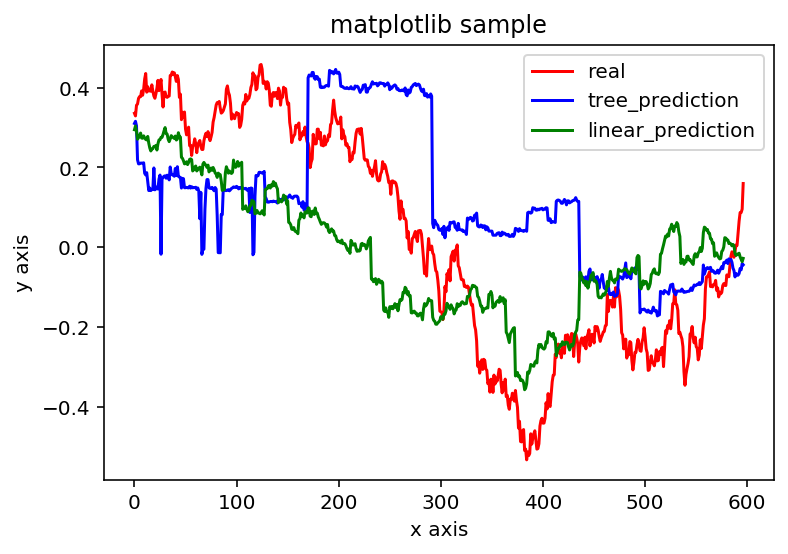

In [38]:
plt.plot(y_test,'red',label='real')
plt.plot(lgb_pred,'blue',label='tree_prediction')
plt.plot(ridge_pred,'green',label='linear_prediction')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('matplotlib sample')
plt.legend(loc='upper right')
plt.show()

In [49]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

class CustomMetric():

    def __init__(self, pred, real):
            self.pred = pred
            self.real = real
            self.thr25 = np.percentile(self.real, 25)
            self.thr75 = np.percentile(self.real, 75)
            self.df = pd.DataFrame({'pred' : self.pred, 'real' : self.real})
        
    def issame(self, data1, data2):
        if data1 > 0 and data2 > 0 : 
            return 'T'
        elif data1 > 0 and data2 < 0 :
            return 'F'
        elif data1 < 0 and data2 > 0 :
            return 'F'
        elif data1 < 0 and data2 < 0 :
            return 'T'
        elif data1 == 0 or data2 == 0 :
            return 0
        else :
            return 'notcal'

    def getouter(self, data1, data2): #quantile_25 = np.percentile(values, 25)

        if data1 > 0 and data2 >= self.thr75 :
            return 'T'
        elif data1 < 0 and data2 <= self.thr25 :
            return 'T'
        elif data1 >= 0 and data2 <= self.thr25 :
            return 'F'
        elif data1 <= 0 and data2 >= self.thr75: 
            return 'F'
        else:
            return 'notcal'
        
    def makedf(self):
        self.df['TF'] = self.df.apply(lambda x : self.issame(x['pred'], x['real']), axis = 1)
        self.df['thrTF'] = self.df.apply(lambda x : self.getouter(x['pred'], x['real']), axis = 1)
        
        return self.df
        
    def execution(self):
        mdf = pd.DataFrame()
        mdf['CORR'] = [self.df['real'].corr(self.df['pred'], method = 'pearson')]
        mdf['R2'] = ["{0:0.4f}".format(r2_score(self.df['real'], self.df['pred']))]
        mdf['MAE'] = ["{0:0.4f}".format(mean_absolute_error(self.df['pred'], self.df['real']))]
        mdf['RMSE'] = ["{0:0.4f}".format(np.sqrt(mean_squared_error(self.df['pred'], self.df['real'])))]
        mdf['ACR'] = [sum(self.df['TF'] == 'T')/len(self.df['TF'])]
        
        mdf['threshACR'] = [sum(self.df['thrTF'] == 'T') / sum(self.df['thrTF'] != 'notcal')]
        
        return mdf     

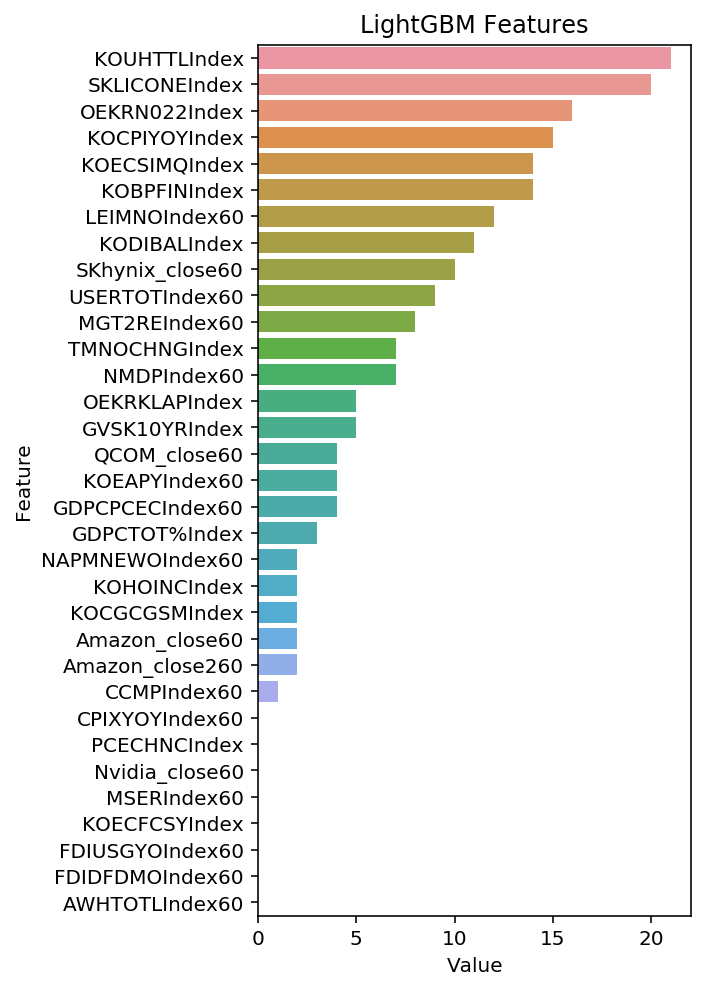

In [84]:
feat_imp = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_, X_train.columns)), columns = ['Value', 'Feature'])
feat_imp.sort_values(by = 'Value', ascending = False)
plt.figure(figsize = (5, 7))
sns.barplot(x = 'Value', y = 'Feature', data = feat_imp.sort_values(by = 'Value', ascending = False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.savefig('lgbm_importances_1.png')
plt.show()